<a href="https://colab.research.google.com/github/viniciusacosta/Telecom_Churn/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Descrição geral do problema**

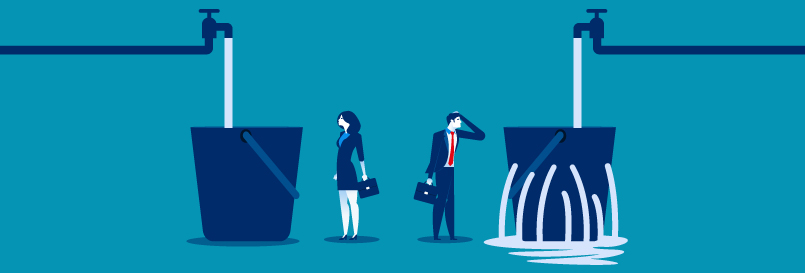

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. Prever este tipo de comportamento é vital para empresas de telecomunicações possam manter seus clientes. Tendo em vista o fato de ser muito mais custoso conseguir novos usuários do que manter os antigos. Por este motivo, grandes corporações visam cada vez mais novos métodos de prever este tipo de comportamento.

**O objetivo** deste projeto é utilizar a linguagem Python, para criar um modelo de aprendizagem de máquina que possa prever se um cliente pode ou não cancelar seu plano em uma Operadora de Telecomunicações, a partir de características dos como: 
  - Informações demógraficas.
  - Informações das contas.
  - Informações dos serviços contratados.

Este tipo de estudo/projeto oferece a empresa a capacidade de basear suas decisões e planejamento estratégico a partir de dados, com o intuito de diminuir as taxas de Churn, e consequentemente melhorarando a satisfação dos clientes e as receitas da empresa.

# **2. Carregando Dados**

## **2.1 Importando bibliotecas**


Começaremos nosso projeto, importanto todas as bilbiotecas necessárias, para a realização das fases iniciais de exploração, e transformação dos dados (Data Munging).

In [1]:
# Importando bibliotecas para a manipulação e exploração dos conjuntos de dados
import pandas as pd
import numpy as np
import math

# Importando bibliotecas para a plotagem de gráficos com o Seaborn e Matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
import seaborn as sns

# Importando bibliotecas para o pré-processamento e balanceamento dos dados
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Importando bibliotecas para a etapa de modelagem preditiva
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

# Importando bibliotecas para avaliação dos modelos
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

# Importando bibliotecas para salvar os modelos
import pickle

# Importando biblioteca para ocultar Future Warnings
import warnings
warnings.filterwarnings('ignore')

# Importando biblioteca para a utilização do Google Drive
from google.colab import drive
drive.mount('/content/drive')

import time

Mounted at /content/drive


##**2.2 Carregando dataset**

In [2]:
# Carregando conjunto de dados.
df = pd.read_csv('https://raw.githubusercontent.com/viniciusacosta/Telecom_Churn/main/Customer-Churn.csv')

# Exibindo as primeiras linhas do DataFrame.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cada linha do dataset representa um cliente, sendo cada coluna as informações sobre este cliente.

**As features deste dataset aprensentam informações sobre:**

---



- **Serviços para os quais cada cliente se inscreveu:**
  - PhoneService - Possui serviço de telefonia? (Yes, No)
  - MultipleLines - Possui múltiplas linhas? (No phone service, No, Yes)
  - InternetServices - Possui serviço de internet? (DSL, Fiber optic, No)
  - OnlineSecurity - Possui serviço de segurança online? (No internet service, No, Yes)
  - OnlineBackup - Possui serviço de backup online? (No internet service, No, Yes)
  - DeviceProtection - Possui serviço de proteção para seu aparelho? (No internet service, No, Yes)
  - TechSupport - Possui serviço técnico? (No internet service, No, Yes)
  - StreamingTV - Possui serviço de Streaming na TV? (No internet service, No, Yes)
  - StreamingMovies - Possui serviço de Streaming de filmes? (No internet service, No, Yes)

- **Informações da conta do cliente – há quanto tempo eles são clientes:**
  - Tenure - Quantidade de meses no qual o cliente permaneceu com a empresa (Variável Númerica)
  - Contract - Tipo de contrato do cliente (Month-to-Month, One year, Two year).
  - PaperlessBilling - Cliente recebe sua fatura online? (Yes, No)
  - PaymentMethod - Metódo de pagamento (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
  - MontlyCharges - Valor cobrado mensalmente (Variável Númerica).
  - TotalCharges: Valor total cobrado (Variável Númerica)

- **Informaçoes demográficas sobre os clientes:**
  - Gender - Sexo do cliente (Female, Male)
  - SeniorCitizen - O cliente é idoso? ( 0, 1)
  - Partner - Possui parceiros? (Yes, No) 
  - Dependents - Possui dependentes? (Yes, No)


- **Clientes que encerraram seus contratos a pelo menos um mês:**
  - Churn - O cliente encerrou sua conta? (Yes, No)

# **3. Preparação e visão geral dos dados**

##**3.1 Criando funções auxiliares**

In [ ]:
# Criando função para obter um pequeno resumo do dataset
def features_summary(dataframe):

# Criando dicionário para armazenamento das informações
  dict_info = {""             : [], 
               "dtypes"       : [],  
               "Unique Values": [],
               "NUniques"     : [],  
               "NaN values"   : [],
               "Mean"         : [],
               "Min"          : [],
               "Max"          : [],
              }

  # Atribuindo informações sobre as features ao DataFrame
  for col in dataframe.columns:

    # Nome da feature
    dict_info[''].append(col)

    # Tipo de dado da feature
    dict_info['dtypes'].append(dataframe[col].dtypes)

    # Valores únicos na feature
    dict_info["Unique Values"].append(dataframe[col].unique())

    # Quantidade de valores únicos na feature
    dict_info["NUniques"].append(dataframe[col].nunique())

    # Obtendo a média, valor mínimo e valor máximo da feature
    if (dataframe[col].dtypes == object) or (dataframe[col].nunique() == 2):
      dict_info["Mean"].append('-')
      dict_info["Min"].append(dataframe[col].unique()[0])                               
      dict_info["Max"].append(dataframe[col].unique()[1])

    else:
      dict_info["Mean"].append(dataframe[col].mean().round(2))
      dict_info["Min"].append(dataframe[col].min())                               
      dict_info["Max"].append(dataframe[col].max())

    # Verificando o número de NaNs existentes dentro da feature
    dict_info["NaN values"].append(dataframe[col].isna().sum())

  # Transformando dicionário em dataframe
  info = pd.DataFrame.from_dict(data = dict_info)

  # Definindo o índice
  info.set_index("", inplace=True)

  # Exibindo informações
  return info

## **3.2 Visão geral dos dados**

In [ ]:
# Verificando as dimensões do dataset.
df.shape

(7043, 21)

Verificamos a existência de **21 variáveis**, e **7043 observações** dentro do dataset.

Para começar o estudo dos dados, vamos remover a coluna **customerID**, já que ela não é relevante para sabermos se o cliente encerrou seu relacionamento comercial com a empresa.

In [ ]:
# Removendo a feature "customerID"
df.drop(columns=["customerID"], inplace=True)

In [ ]:
# Exibindo informações
features_summary(df)

,dtypes,Unique Values,NUniques,NaN values,Mean,Min,Max
,,,,,,,
gender,object,"[Female, Male]",2,0,-,Female,Male
SeniorCitizen,int64,"[0, 1]",2,0,-,0,1
Partner,object,"[Yes, No]",2,0,-,Yes,No
Dependents,object,"[No, Yes]",2,0,-,No,Yes
tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,0,32.37,0,72
PhoneService,object,"[No, Yes]",2,0,-,No,Yes
MultipleLines,object,"[No phone service, No, Yes]",3,0,-,No phone service,No
InternetService,object,"[DSL, Fiber optic, No]",3,0,-,DSL,Fiber optic
OnlineSecurity,object,"[No, Yes, No internet service]",3,0,-,No,Yes


**A partir deste resumo dos dados, podemos notar que:**
  - A maior parte das variáveis preditoras são features categóricas, e apresentam um baixo número de valores únicos, o que não causará problemas ao criarmos alguns dummies.
  - Apesar da vriável **SeniorCitizen** ser classificada como int64, ela assim como a maiora das variáveis, também é uma feature categórica. 
  - O tipo de dados da feature númerica **TotalCharges** não condiz com seus valores apresentados, sendo necessário a sua transformação de string para float.

##**3.3 Preparação dos dados**

In [ ]:
# Transformando tipo de dado  da feature "TotalCharges" de object para float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Reexibindo informações
df['TotalCharges'].isna().sum()

11

Podemos ver que a feature **"TotalChargers"** apresentava um tipo de dado diferente por existirem espaços vazios na mesma. Por apresentar apenas **11 valores** nulos, podemos removê-los sem grandas problemas.

In [ ]:
# Removendo os valores NaN do dataset
df = df.dropna()

In [ ]:
## Verificando se todos os registros de "No Internet Service"
# Criando um dataset para comparação
df_count = df.copy()

# Criando um dicionário para substituir os valores da feature "InternetService"
dict_net = {'DSL' : 'Yes', 
            'Fiber optic' : 'Yes', 
            'No' : 'No internet service'}

# Alterando os valores na feature "InternetService"
df_count['InternetService'] = df_count['InternetService'].map(dict_net)

# Criando index
df_count[''] = df_count['InternetService']

# Verificando os registros "No Internet Service"
pd.pivot_table( 
    df_count, ['InternetService', 'OnlineSecurity', 'OnlineBackup',  
               'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies'],  
    index=[''],  
    aggfunc='count'  
       )

,DeviceProtection,InternetService,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTV,TechSupport
,,,,,,,
No internet service,1520,1520,1520,1520,1520,1520,1520
Yes,5512,5512,5512,5512,5512,5512,5512


Todos os registros com valor **"No internet service"** nas colunas OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies possuem valor **"No"** na coluna InternetService.

#**4. Análise exploratória dos dados**

##**4.1 Criando funções auxiliares**

In [ ]:
# Criando função para plotar gráficos Box Plot 
def plotBox(numerical_features, y_target, dataframe):
  
    # Número de colunas
    number_of_columns = 2

    # Número de linhas
    number_of_rows = math.ceil(len(numerical_features)/2)

    # Criando figura que irá comportar os gráficos
    fig = plt.figure(figsize=(18, 7 * number_of_rows))

    # Loop para criação dos gráficos das features escolhidas
    for index, col in enumerate(numerical_features, 1):

        # Criando subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.boxplot(x = y_target, y = col, data = dataframe, palette='bright')

        # Definindo título
        ax.set_title(col, fontsize=16, loc='center')

        # Eliminando partes do frame no gráfico
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [ ]:
# Criando função para plotar gráficos de Barra
def plotBar(categorical_features, y_target, dataframe):  
    # Número de colunas
    number_of_columns = 2

    # Número de linhas
    number_of_rows = math.ceil(len(categorical_features)/2)

    # Criando figura que irá comportar os gráficos
    fig = plt.figure(figsize=(18, 7 * number_of_rows))

    # Loop para criação dos gráficos das features escolhidas
    for index, col in enumerate(categorical_features, 1):

        # Criando subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.countplot(col, hue = y_target, data = dataframe, palette='bright')

        # Definindo título
        ax.set_title(col, fontsize=16, loc='center')

        # Eliminando partes do frame no gráfico
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [ ]:
# Criando função para plotar gráficos de frequência
def percentBar(feature, dataframe):
  # Criando figura
  fig, ax = plt.subplots(figsize=(12,8))

  # Calculando a taxa de churn
  total_prct = pd.DataFrame(dataframe[feature].value_counts()*100 /len(dataframe)).reset_index()

  # Criando um gráfico de barras
  total_prct.plot(kind='bar', ax=ax)
  plot = sns.barplot(x=total_prct['index'], y = total_prct[feature], palette='bright')

  # Definindo título e labels
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.set_title('Taxa de ' + feature,
             fontsize=18, loc='center')
  ax.set_xlabel('Churn', fontsize=14)
  ax.set_ylabel('% Customers',size = 14)
  ax.tick_params(rotation='auto')

  # Removendo legenda
  plt.legend([],[], frameon=False)

  # Eliminando partes do frame no gráfico
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

##**4.2 Explorando distribuição das features**

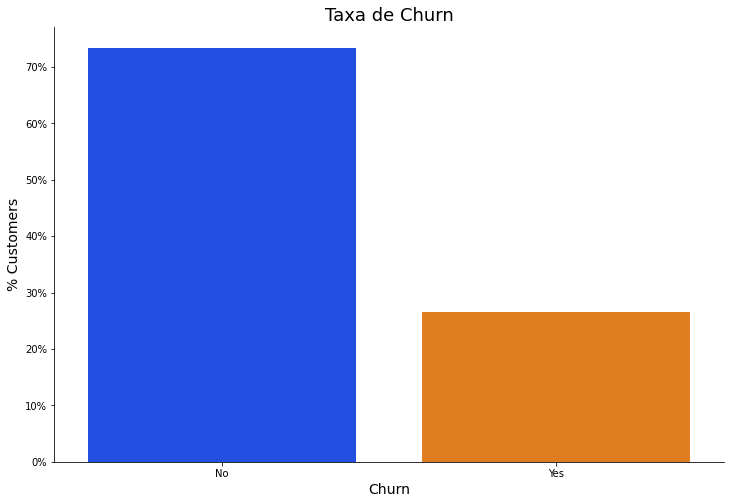

In [ ]:
# Definindo a váriavel alvo
feature = 'Churn'

# Plotando gráficos Box Plot 
percentBar(feature, df)

Podemos perceber observando o gráfico um desbalanceamento na variável Churn, onde menos de 30% dos clientes cancelaram o serviço.

Isto pode causar problemas ao treinar os modelos de machine learning, tendo-se em vista que, com este tipo de balanceamento o modelo terá uma certa predisposição em classificar a maioria dos casa como **"No"**. Sendo necessário o balanceamento da amostra.

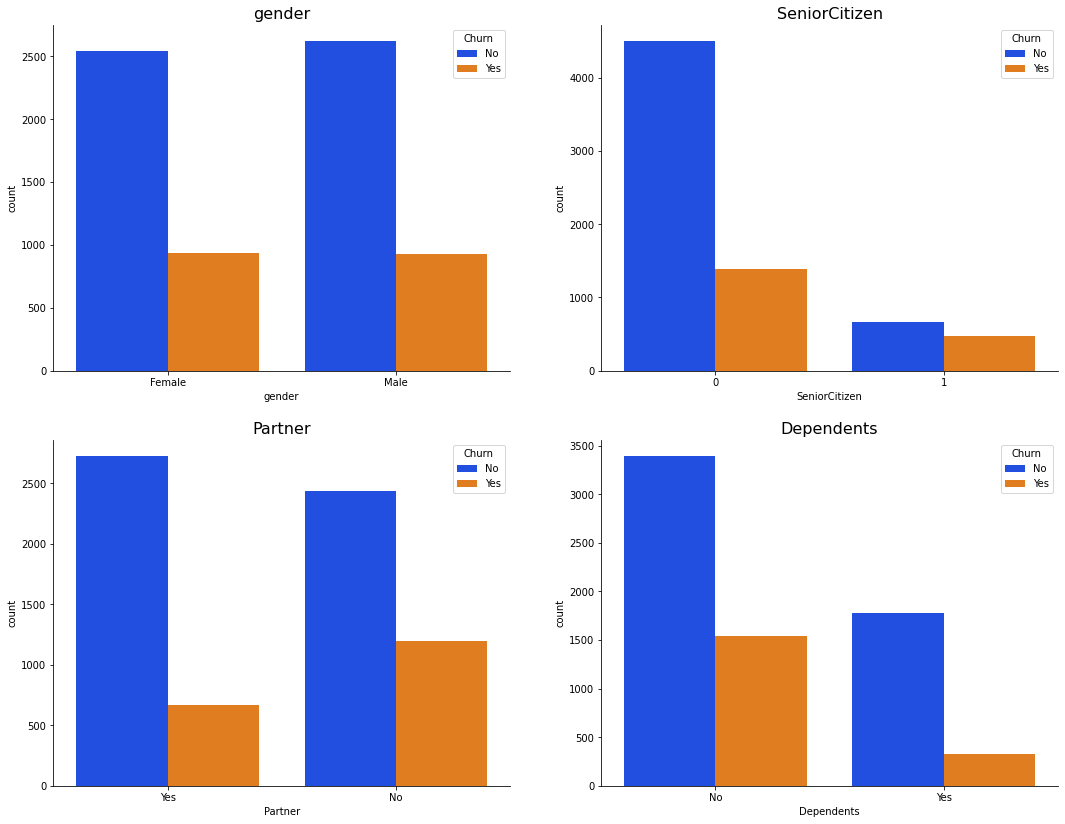

In [ ]:
# Definindo o nome das features a serem analisadas
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Definindo a váriavel alvo
y_target = 'Churn'

# Plotando gráficos de Barra  
plotBar(cat_features, y_target, df)

As taxas de Churn nos atributos demográficos apresentadas são maiores entre pessoas idosas (**SeniorCitizen**), pessoas que não possuem parceiros (**Partner**) e também não possuem dependentes (**Dependents**). Já ao analisarmos as diferenças entre os sexos (**Gender**), vemos que os gráficos são praticamente identicos, ou seja, o sexo do cliente não influencia em sua decisão de encerrar sua relaçao com a empresa

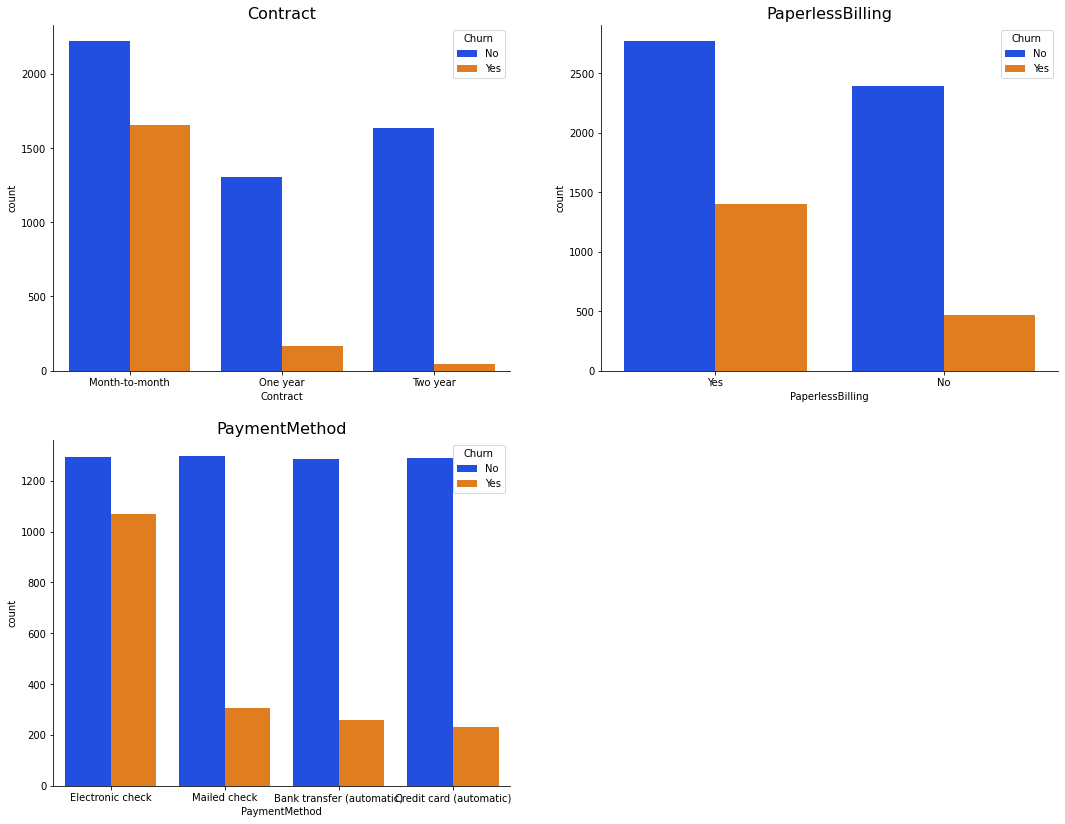

In [ ]:
# Definindo o nome das features a serem analisadas
cat_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Definindo a váriavel alvo
y_target = 'Churn'

# Plotando gráficos de Barra  
plotBar(cat_features, y_target, df)

Analisando as informações sobre as contas dos clientes observamos que:

- Clientes com contratos anuais de um ou dois anos possuem taxas de Churn menores que aqueles com contratos mensais
- Clientes que assinam ao modelo de fatura eletrônica (**PaperlessBilling**) são menos propensas a cancelarem seus contratos
- Clientes que escolhem o metódo de pagamento (**PaymentMethod**) "Eletronic check" possuem maiores chances de cancelar suas contas

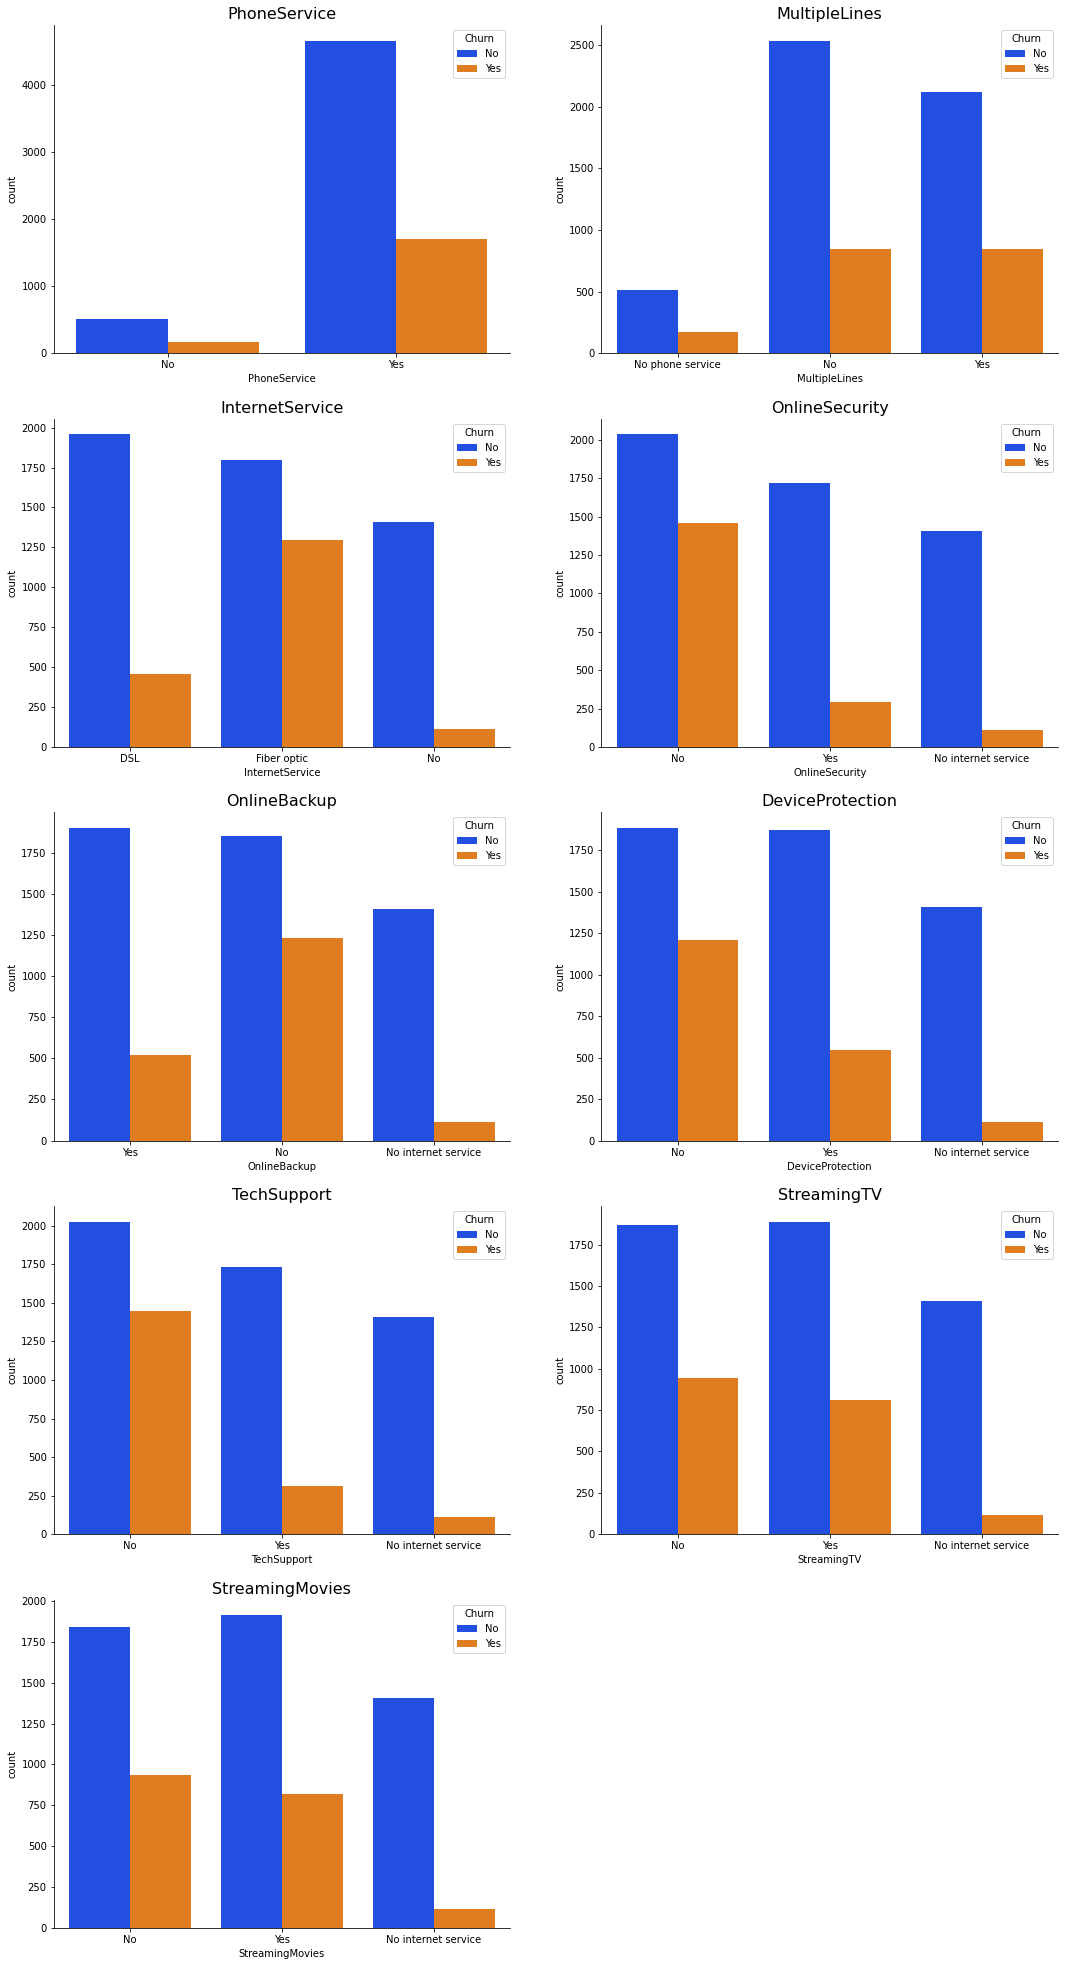

In [ ]:
# Definindo o nome das features a serem analisadas
cat_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Definindo a váriavel alvo
y_target = 'Churn'

# Plotando gráficos de Barra  
plotBar(cat_features, y_target, df)

Podemos perceber que os gráficos sobre os serviços contratados pelos clientes possuem um padrão de taxa de Churn, com a excessão dos serviços de internet(**InternetService**) com os clientes que assinaram a fiba óptica,  é observável que usuários que não contratam serviços adicionais tem uma maior tendência de cancelarem suas contas.

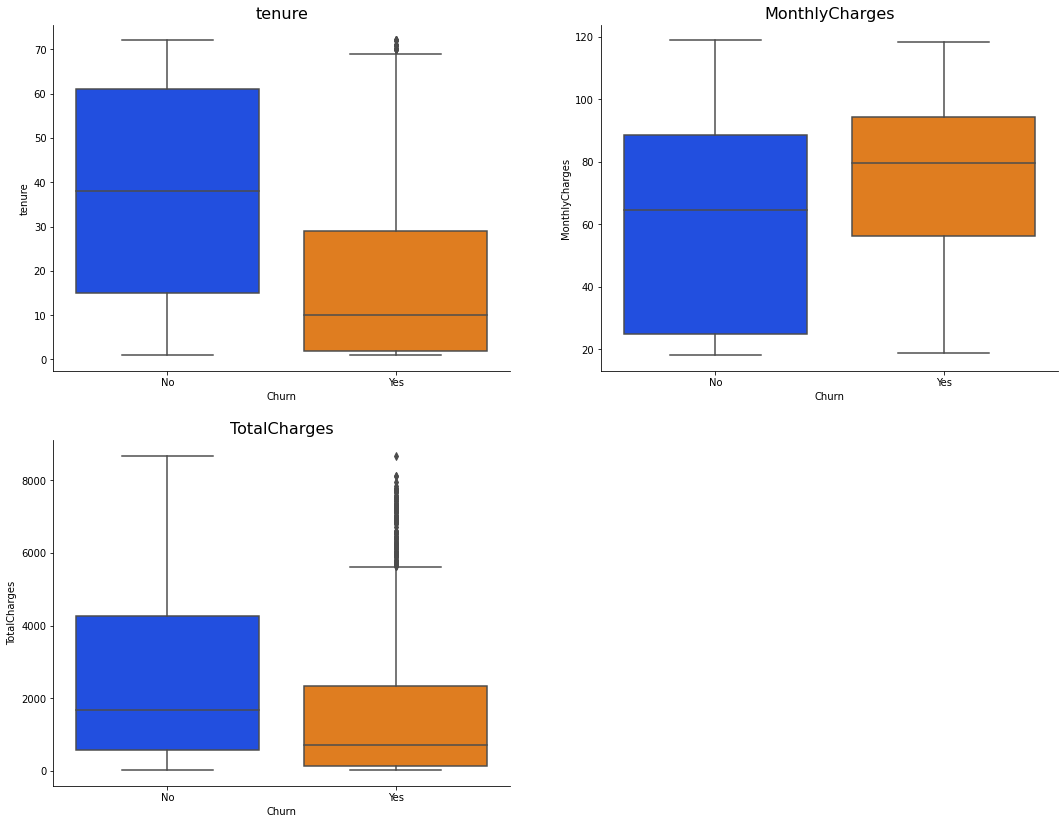

In [ ]:
# Definindo o nome das features a serem analisadas
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Definindo a váriavel alvo
y_target = 'Churn'

# Plotando gráficos Box Plot  
plotBox(num_features, y_target, df)

É observável que apesar dos clientes que possuem maiores gastos totais  (**TotalCharges**) tendam a cancelarem menos as suas contas, aqueles no qual gastam mais mensalmente(**MonthlyCharges**) tem maiores chances de cancelarem suas relaçoes com a empresa.

Outro importante ponto observável é o de que as taxas de Churn são maiores entre novos clientes (baixo **tenure**).

# **5. Feature Engineering**


##**5.1 Criando funções auxiliares**

In [ ]:
# Criando uma função para converter variáveis para o tipo categórico, e criar suas respectivas versões dummy
def dataEncoding (dataframe, binary_features=[], categorical_features=[]):

    # Criando um cópia do Dataset original
    df_transformed = dataframe.copy()

    # Label Encoding, transformando features binárias
    if len(binary_features) > 0:
      for binary in binary_features:  
        df_transformed[binary] = LabelEncoder().fit_transform(df_transformed[binary])
    
    # Criando variáveis dummy a partir de variáveis categóricas para o conjunto de dados
    if len(categorical_features) > 0:
      df_transformed = pd.get_dummies(df_transformed, columns = categorical_features)

    # Retornando Dataset
    return df_transformed

In [ ]:
# Criando uma função para a normalização das variáveis númericas
def normalization(dataframe, num_features, scaler):
  
  # Criando um cópia do Dataset original
  df_transformed = dataframe.copy()

  # Normalizando os dados
  df_transformed[num_features] = scaler.fit_transform(df_transformed[num_features])

  # Retornando Dataset
  return df_transformed

## **5.2 Label e One-Hot Enconding** 

In [ ]:
# Definindo as variáveis binárias
bi_features = ['gender', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling', 'Churn']

# Definindo as variáveis categóricas
cat_categories = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'Contract', 'PaymentMethod']

# Criando um novo Dataset
df_transformed = dataEncoding(dataframe            =  df, 
                              binary_features      =  bi_features,  
                              categorical_features =  cat_categories
                              )

##**5.3 Normalizando Features númericas**

In [ ]:
# Definindo variáveis númericas
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Normalização através do MinMaxScaler
df_transformed = normalization(dataframe    = df_transformed,  
                               num_features = features, 
                               scaler       = MinMaxScaler()  
                               )

##**5.4 Balanceamento do dataset**

Como já dito anteriormente, o fato de existir um número muito maior de clientes que não cancelaram suas contas (desbalancemanto do dataset), pode causar um certo enviesamento nos modelos a serem treinados. Para evitar este tipo de problema, iremos aplicar três diferentes tipos de técnicas de balanceamento:

- **RandomUnderSampler (Under-Sampling):** RandomUnderSampler remove aleatoriamente linhas da classe majoritária com o intuito de deixar as classes proporcionais.

- **Synthetic Minority Oversampling Technique (SMOTE):** SMOTE assim como o nome sugere funciona de "maneira contrária" do Undersampling. Através da geração de amostras sintéticas das classes minóritarias.

- **Adaptive Synthetic (ADASYN):** Este metódo funciona de maneira parecida com o SMOTE, porém gera diferentes números de amostras dependendo da estimativa da distribuição da amostras minoritárias.

In [ ]:
# Definindo o nome das features
features = df_transformed[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

# Definindo a váriavel alvo
y_target = df_transformed['Churn']

# Holdout Treino Teste
x_train, x_test, y_train, y_test = train_test_split(features, y_target, test_size=0.3, random_state=42)

###**5.4.1 Under-Sampling - RandomUnderSampler**

In [ ]:
# Under-Sampling
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_train, y_train)

###**5.4.2 Over-sampling - Synthetic Minority Oversampling Technique (SMOTE)**

In [ ]:
# Over-sampling
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

###**5.4.3 Over-sampling - Adaptive Synthetic (ADASYN)**

In [ ]:
# Over-sampling
adasyn = ADASYN()
x_ADASYN, y_ADASYN = adasyn.fit_resample(x_train, y_train)

#**6. Modelagem preditiva**

##**6.1 Criando funções auxiliares**

In [ ]:
# Criando função para o treinamento de modelos e cálculo de suas métricas
def classifiersTraining(x_train, x_test, y_train, y_test, models, sufix=''):

    # Criando Listas para armazenar os resultados dos algoritmos
    cf_matrix_list = []

    # Criando um Dataframe para armazenar a média e o desvio-padrão de cada um dos algoritmos testados
    results   = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1', 'ROC AUC'])

    # Loop para o treinamento e cálculo de parâmetros para cada um dos modelos da lista de modelos
    for model in models:

      # Treinando modelo.
      model.fit(x_train, y_train)
      yHat = model.predict(x_test)

      # Obtenção e  da Matriz de Confusão
      cf_matrix = confusion_matrix(y_test, yHat)
      
      # Adicionando a Matriz de Confusão em uma lista
      cf_matrix_list.append(cf_matrix)
            
      # Calculando métricas.
      accuracy  = accuracy_score(y_test, yHat)  # Determina a precisão geral prevista do modelo
      precision = precision_score(y_test, yHat) # Determina a proporção de classificações positivas, que realmente são positivas
      recall    = recall_score(y_test, yHat)    # Determina a proporção de registros positivos que foram classificados pelo algoritmo  como positivos
      f1        = f1_score(y_test, yHat)        # Determina a média Harmônica entre a precision e o recall do modelo
      roc_auc   = roc_auc_score(y_test, yHat)   # Determina a medida de separabilidade ROC. Ela indica o quanto o modelo é capaz de distinguir  as classes

      # Adicionando as métricas para o dataframe "results"
      results = results.append (  
          pd.DataFrame (  
              data    = [[accuracy, precision, recall, f1, roc_auc]], 
              columns = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1', 'ROC AUC'], 
              index   = [f'{model.__class__.__name__}: {sufix} ']  
              ) 
          )
      
    return results, cf_matrix_list

In [ ]:
# Criando função para plotar as Matrizes de Confusão
def plotConfusionMatrix(cf_matrix_list, models):

    # Número de colunas
    number_of_columns = 2

    # Número de linhas.
    number_of_rows = math.ceil(len(models)/2)

    # Índice para a ordenação das matrizes
    index_num = list(range(1, len(models)+1))

    # Criando figura que irá comportar as matrizes
    fig = plt.figure(figsize=(20, 9 * number_of_rows))

    # Loop para criação das matrizes
    for index, cf_matrix, model in zip(index_num, cf_matrix_list, models):

      # Criando subplot
      ax = fig.add_subplot(number_of_rows, number_of_columns, index)

      # Criando lista com os valores absolutos e de frequencia percentual da matriz de confusão
      group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
      group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

      # 
      labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]

      labels = np.asarray(labels).reshape(2,2)

      ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

      # Definindo labels e o título do gráfico
      ax.set_title(f'{model.__class__.__name__}', fontsize=18); 
      ax.set_xlabel('P R E D I C T')
      ax.set_ylabel('R E A L');

      # Definindo ticklabels do gráfico
      ax.xaxis.set_ticklabels(['NÃO', 'SIM'])
      ax.yaxis.set_ticklabels(['NÃO', 'SIM'])

##**6.2 Criando modelos**

In [ ]:
# Lista de modelos a serem treinados
models = [LogisticRegression(), 
          LinearDiscriminantAnalysis(), 
          GaussianNB(), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(), 
          AdaBoostClassifier(), 
          GradientBoostingClassifier(), 
          SVC(),  
          RandomForestClassifier(), 
          xgb.XGBClassifier(),  
          DummyClassifier(random_state=2, strategy='most_frequent')]

###**6.2.1 Dataset não balanceado**


In [ ]:
# Treinando modelos e obtendo suas métricas
results, cf_matrix_list = classifiersTraining(x_train, x_test, y_train, y_test, models, sufix='')

# Dataframe com as métricas dos modelos
results

,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
LogisticRegression:,0.796209,0.640257,0.532977,0.581712,0.712260
LinearDiscriminantAnalysis:,0.793365,0.626775,0.550802,0.586338,0.716008
GaussianNB:,0.686256,0.451859,0.844920,0.588820,0.736856
KNeighborsClassifier:,0.756398,0.542805,0.531194,0.536937,0.684577
DecisionTreeClassifier:,0.720853,0.476271,0.500891,0.488271,0.650704
AdaBoostClassifier:,0.790995,0.633333,0.508021,0.563798,0.700751
GradientBoostingClassifier:,0.800474,0.654867,0.527629,0.584403,0.713460
SVC:,0.788626,0.636580,0.477718,0.545825,0.689472
RandomForestClassifier:,0.779621,0.607143,0.484848,0.539148,0.685613
XGBClassifier:,0.798578,0.655963,0.509804,0.573721,0.706484


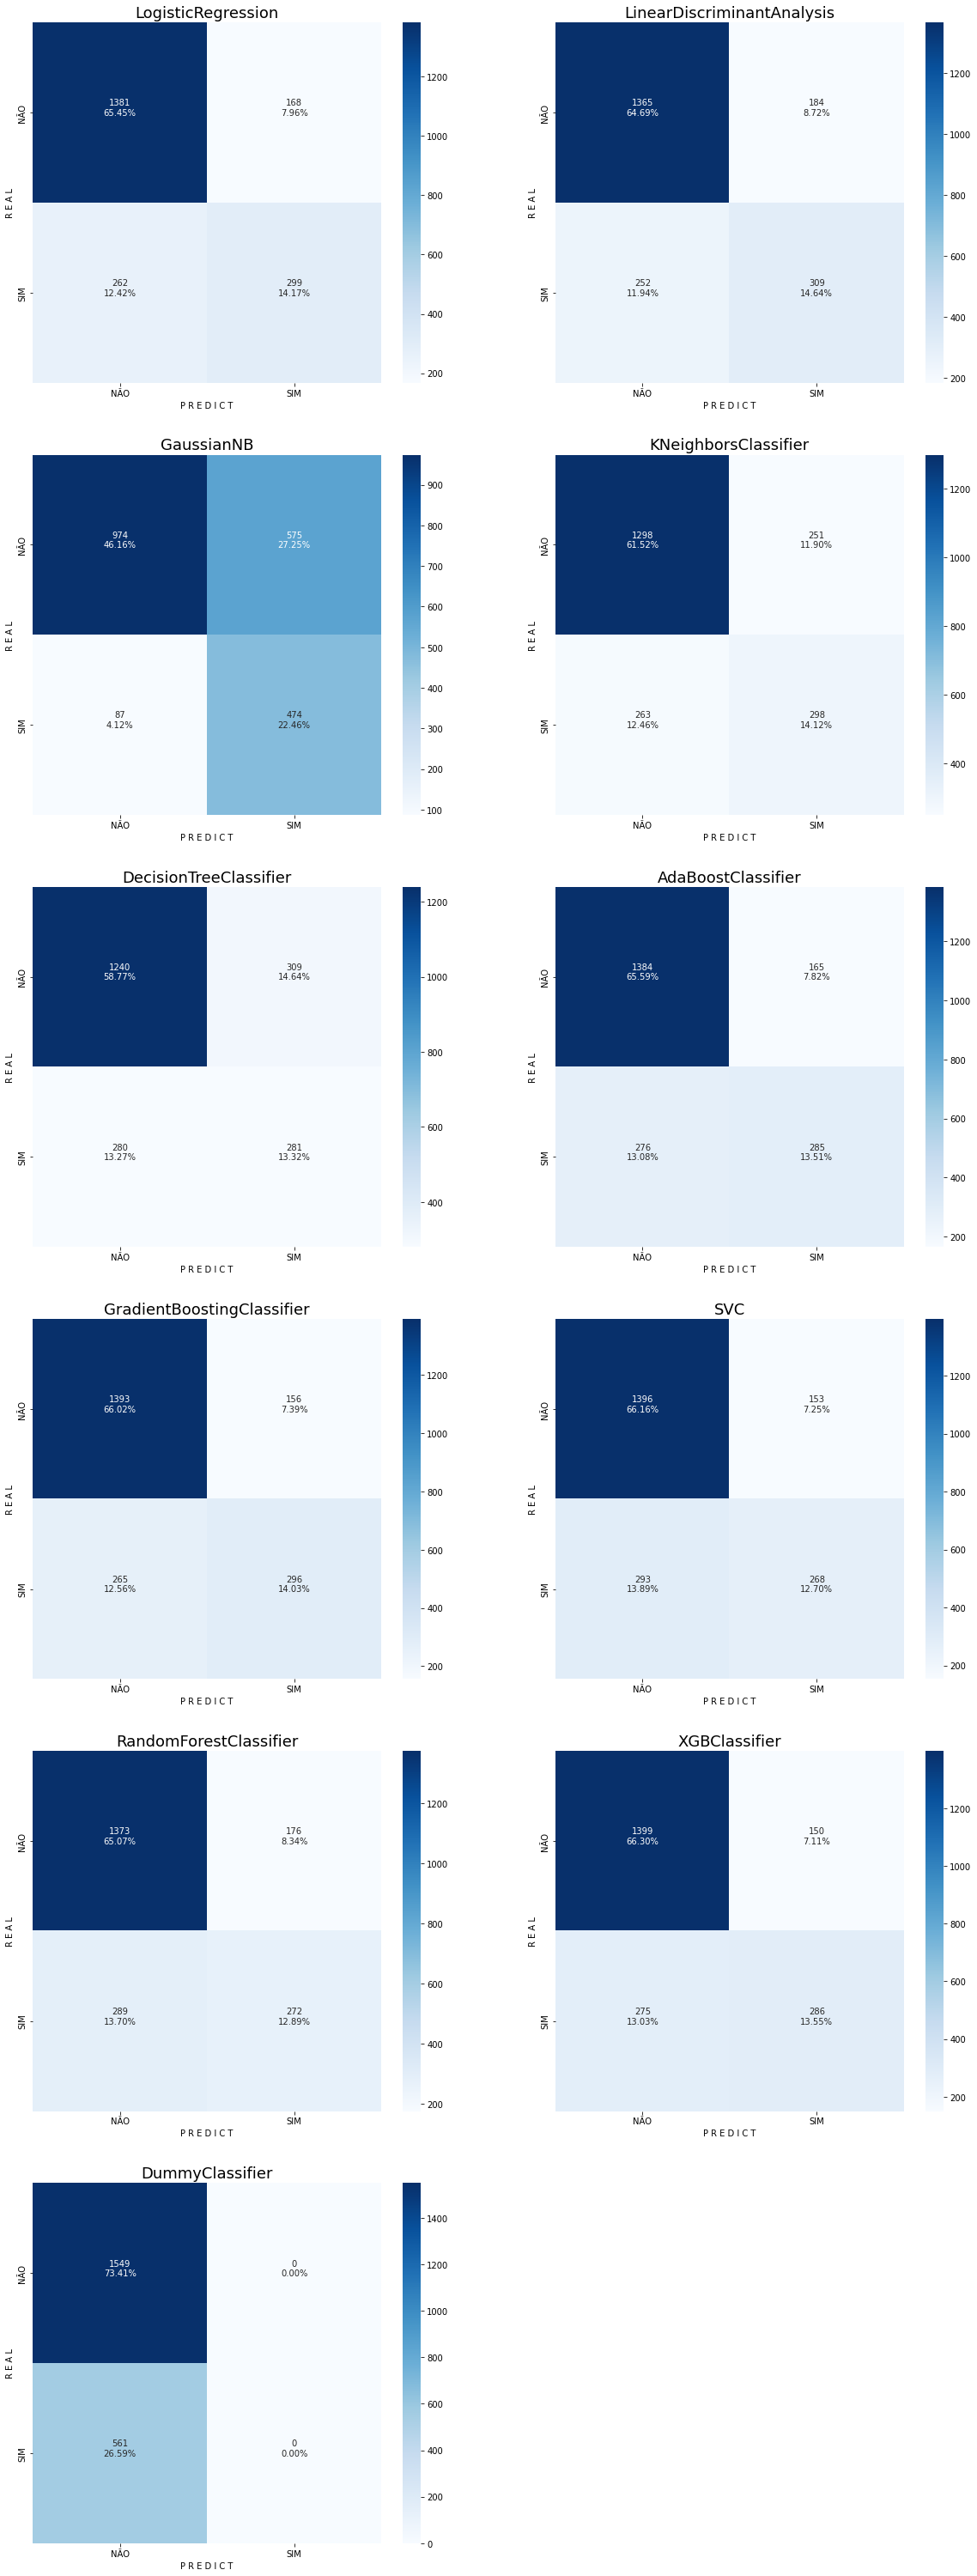

In [ ]:
# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list, models)

###**6.2.2 Dataset balanceado - Under-Sampling (RandomUnderSampler)**

In [ ]:
# Treinando modelos e obtendo suas métricas
results_rus, cf_matrix_list_rus = classifiersTraining(x_rus, x_test, y_rus, y_test, models, sufix='RUS')

# Dataframe com as métricas dos modelos
results_rus

,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
LogisticRegression: RUS,0.740758,0.507919,0.800357,0.621453,0.759765
LinearDiscriminantAnalysis: RUS,0.741706,0.508929,0.812834,0.625944,0.764390
GaussianNB: RUS,0.666825,0.435337,0.852050,0.576251,0.725896
KNeighborsClassifier: RUS,0.692417,0.456262,0.818182,0.585833,0.732525
DecisionTreeClassifier: RUS,0.655450,0.412815,0.700535,0.519498,0.669828
AdaBoostClassifier: RUS,0.729384,0.494703,0.832442,0.620598,0.762251
GradientBoostingClassifier: RUS,0.737441,0.503902,0.805704,0.620027,0.759211
SVC: RUS,0.721801,0.485839,0.795009,0.603110,0.745148
RandomForestClassifier: RUS,0.713270,0.476035,0.778966,0.590940,0.734222
XGBClassifier: RUS,0.726066,0.490811,0.809269,0.611036,0.752601


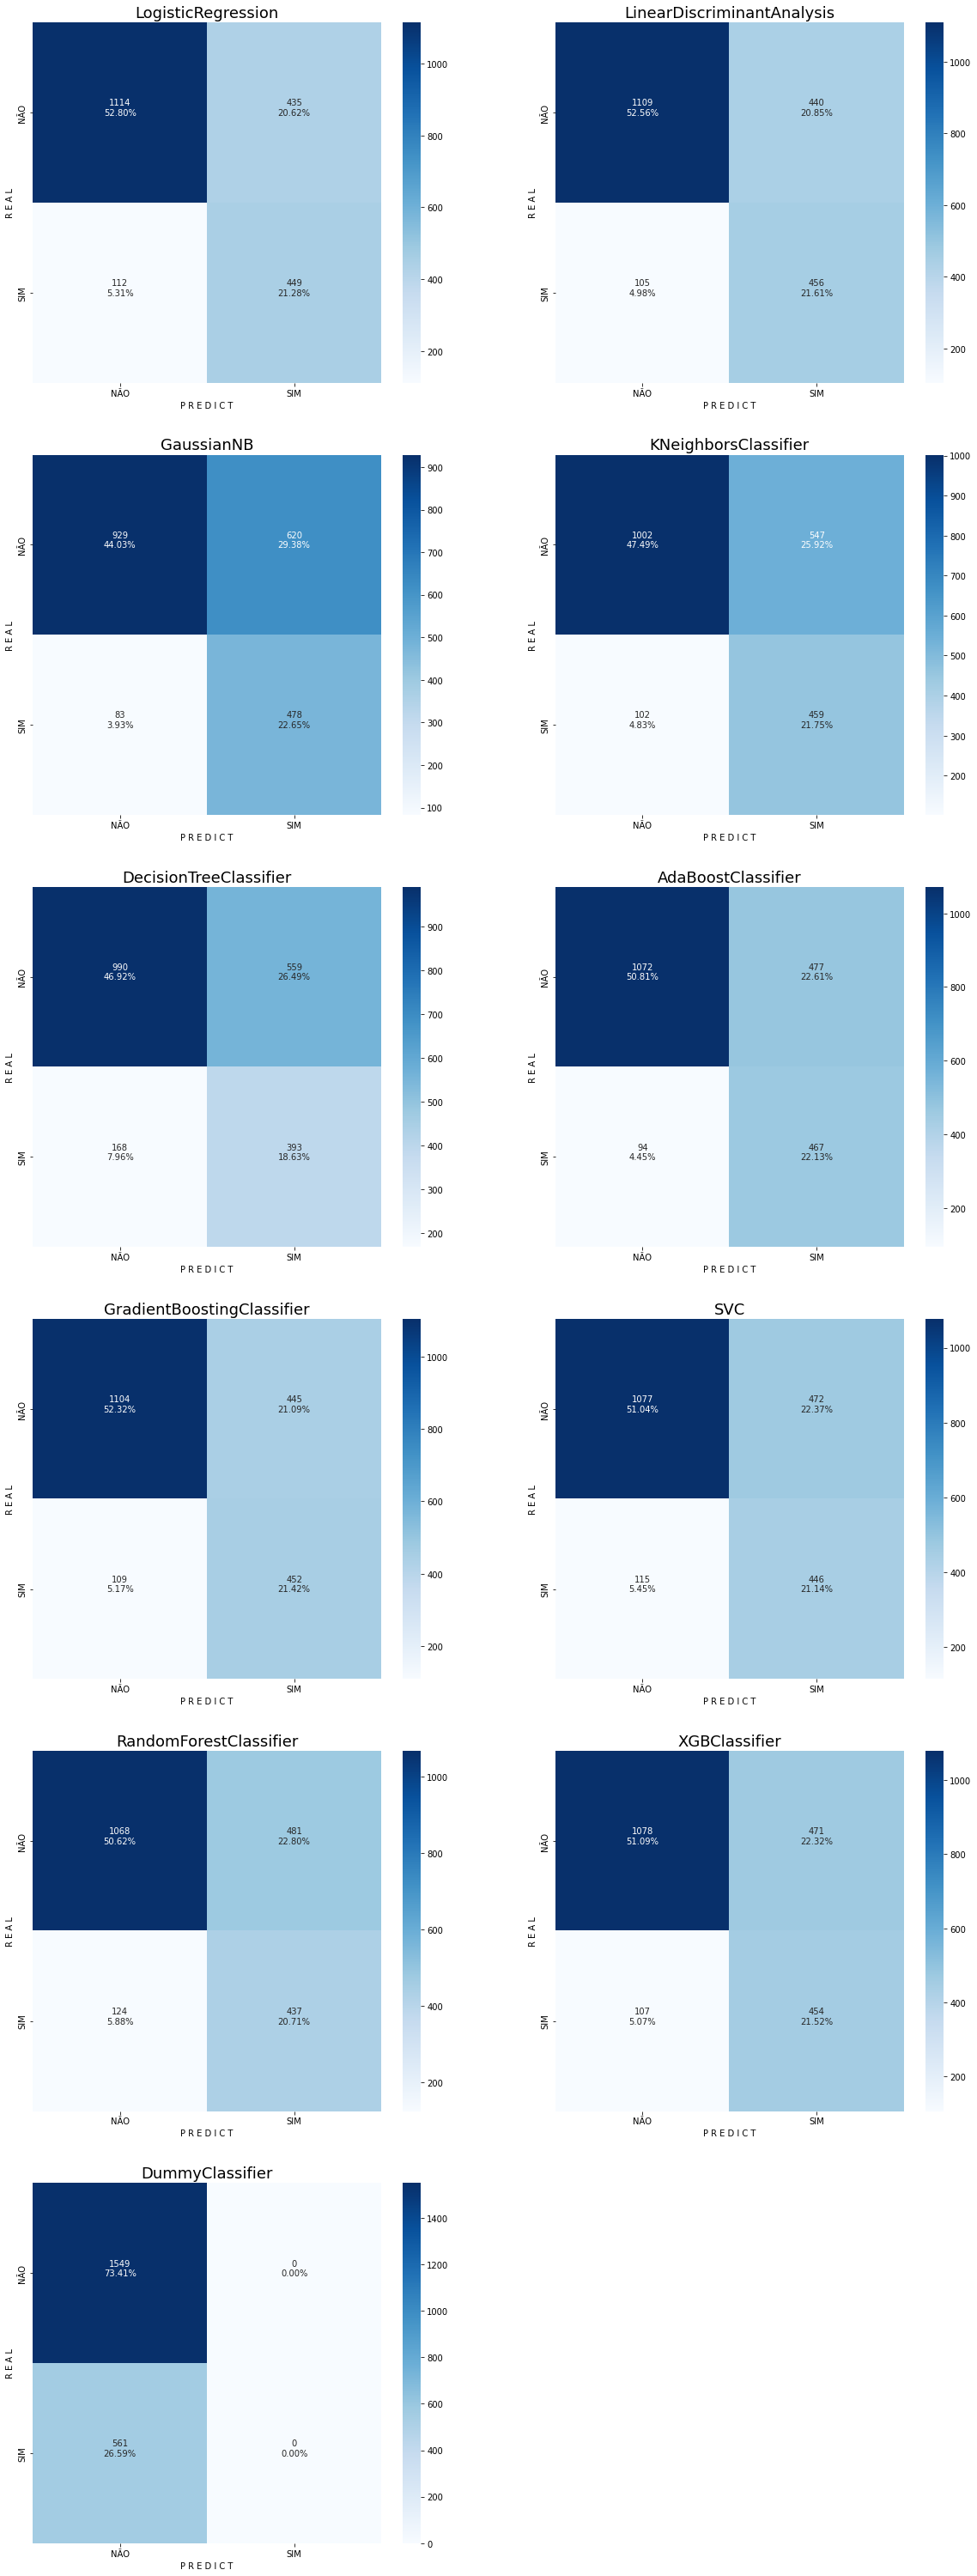

In [ ]:
# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list_rus, models)

###**6.2.3 Dataset balanceado - Over-Sampling (SMOTE)**

In [ ]:
# Treinando modelos e obtendo suas métricas
results_SMOTE, cf_matrix_list_SMOTE = classifiersTraining(x_smote, x_test, y_smote, y_test, models, sufix='SMOTE')

# Dataframe com as métricas dos modelos
results_SMOTE


,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
LogisticRegression: SMOTE,0.778673,0.567143,0.707665,0.629659,0.756027
LinearDiscriminantAnalysis: SMOTE,0.777725,0.563014,0.732620,0.636716,0.763341
GaussianNB: SMOTE,0.694787,0.458788,0.823529,0.589286,0.735845
KNeighborsClassifier: SMOTE,0.715166,0.475490,0.691622,0.563544,0.707657
DecisionTreeClassifier: SMOTE,0.711374,0.465517,0.577540,0.515513,0.668693
AdaBoostClassifier: SMOTE,0.745972,0.514863,0.771836,0.617689,0.754220
GradientBoostingClassifier: SMOTE,0.757820,0.530788,0.768271,0.627822,0.761153
SVC: SMOTE,0.759716,0.537604,0.688057,0.603597,0.736863
RandomForestClassifier: SMOTE,0.765403,0.551724,0.627451,0.587156,0.721408
XGBClassifier: SMOTE,0.758768,0.532020,0.770053,0.629279,0.762367


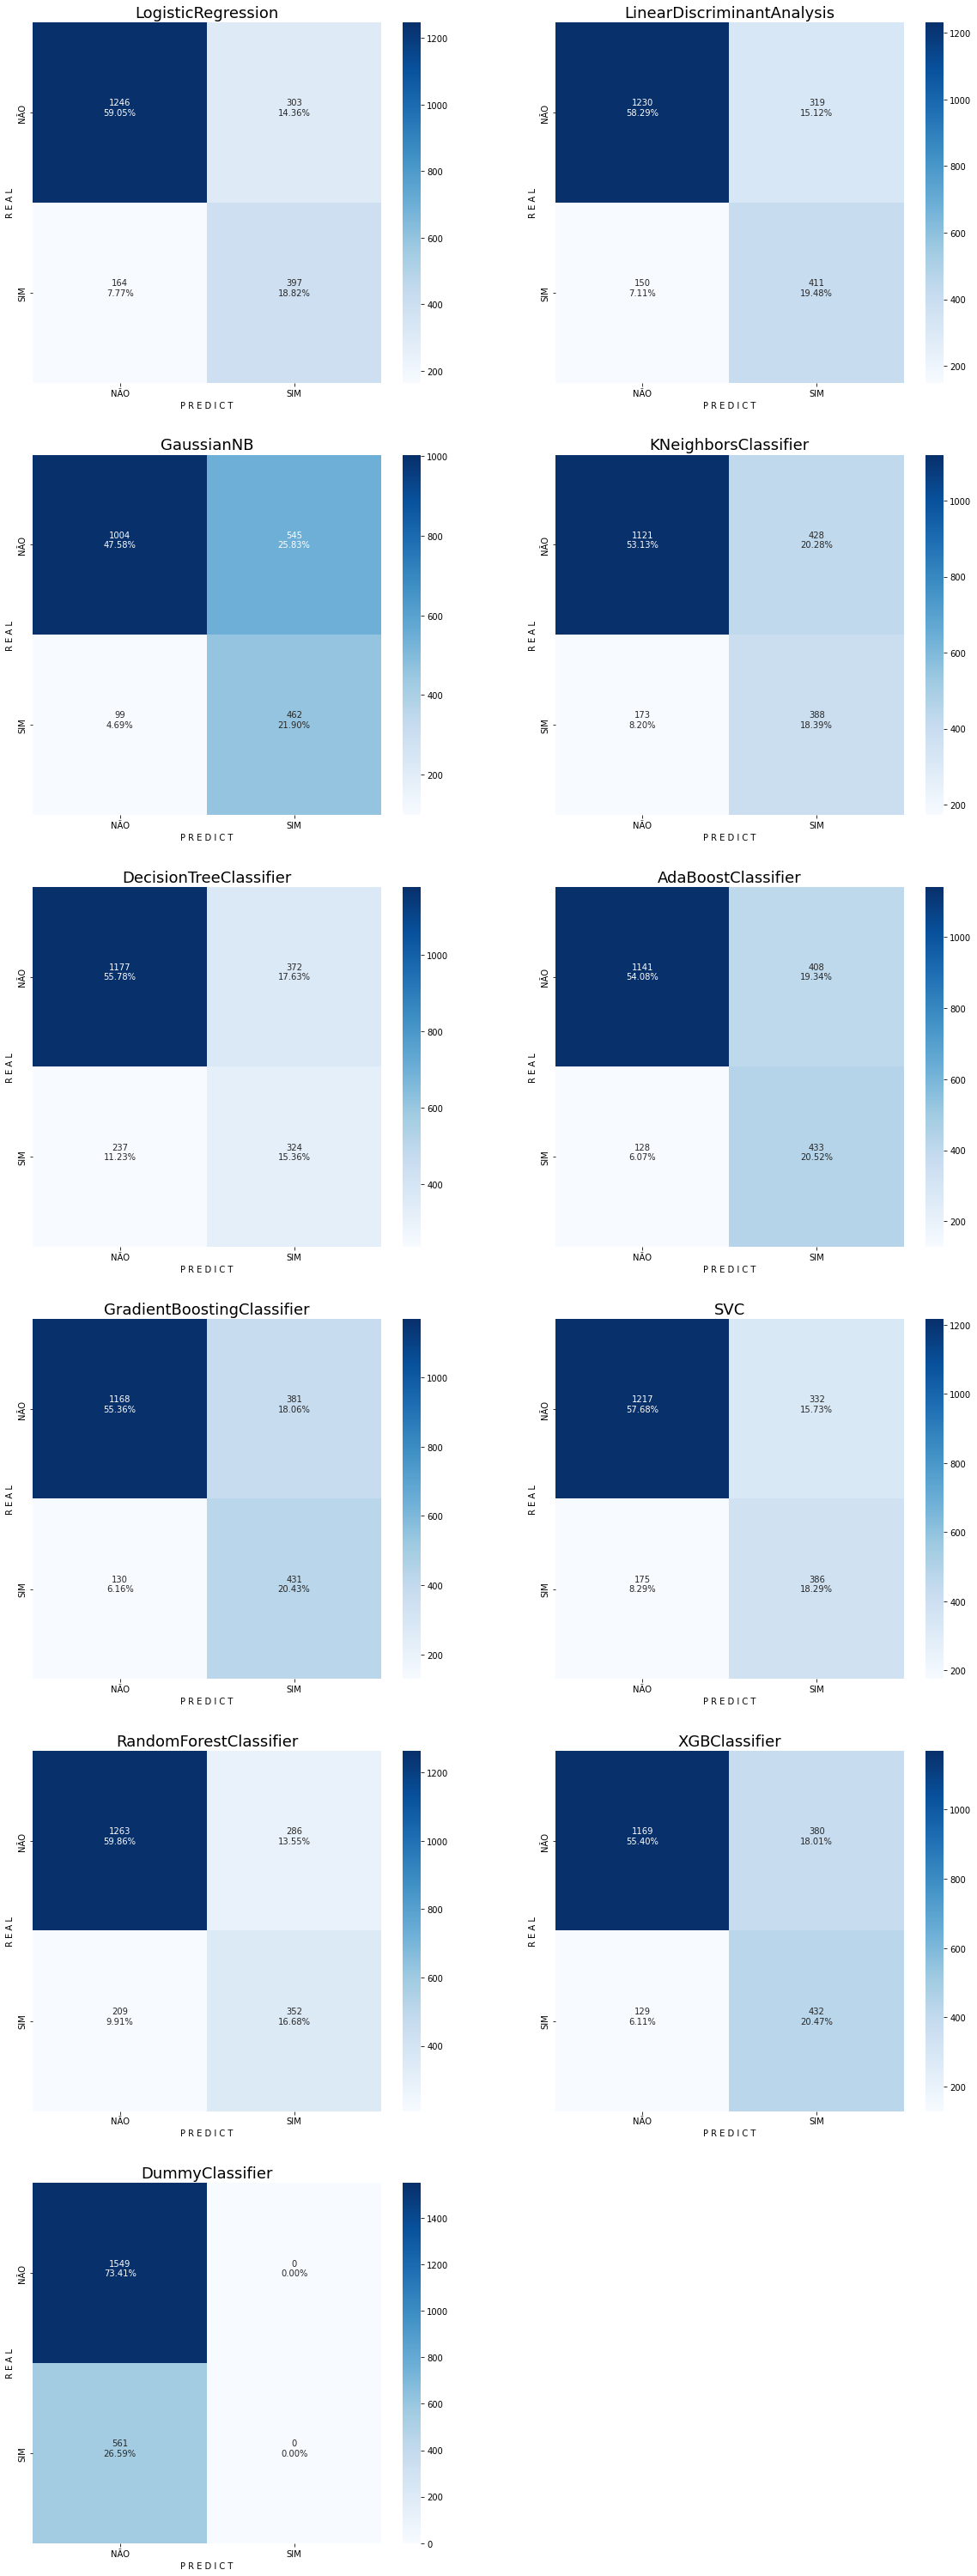

In [ ]:
# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list_SMOTE, models)

###**6.2.4 Dataset balanceado - Over-Sampling (ADASYN)**

In [ ]:
# Treinando modelos e obtendo suas métricas
results_ADASYN, cf_matrix_list_ADASYN = classifiersTraining(x_ADASYN,  x_test, y_ADASYN, y_test, models, sufix='ADASYN')

# Dataframe com as métricas dos modelos
results_ADASYN

,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
LogisticRegression: ADASYN,0.774882,0.561254,0.702317,0.623911,0.751740
LinearDiscriminantAnalysis: ADASYN,0.779147,0.566434,0.721925,0.634796,0.760898
GaussianNB: ADASYN,0.675355,0.442593,0.852050,0.582572,0.731706
KNeighborsClassifier: ADASYN,0.702844,0.461538,0.705882,0.558140,0.703813
DecisionTreeClassifier: ADASYN,0.720853,0.479532,0.584670,0.526908,0.677422
AdaBoostClassifier: ADASYN,0.741706,0.509195,0.789661,0.619147,0.757000
GradientBoostingClassifier: ADASYN,0.754976,0.526699,0.773619,0.626715,0.760922
SVC: ADASYN,0.753081,0.526810,0.700535,0.601377,0.736323
RandomForestClassifier: ADASYN,0.756398,0.536098,0.622103,0.575908,0.713569
XGBClassifier: ADASYN,0.750711,0.520710,0.784314,0.625889,0.761427


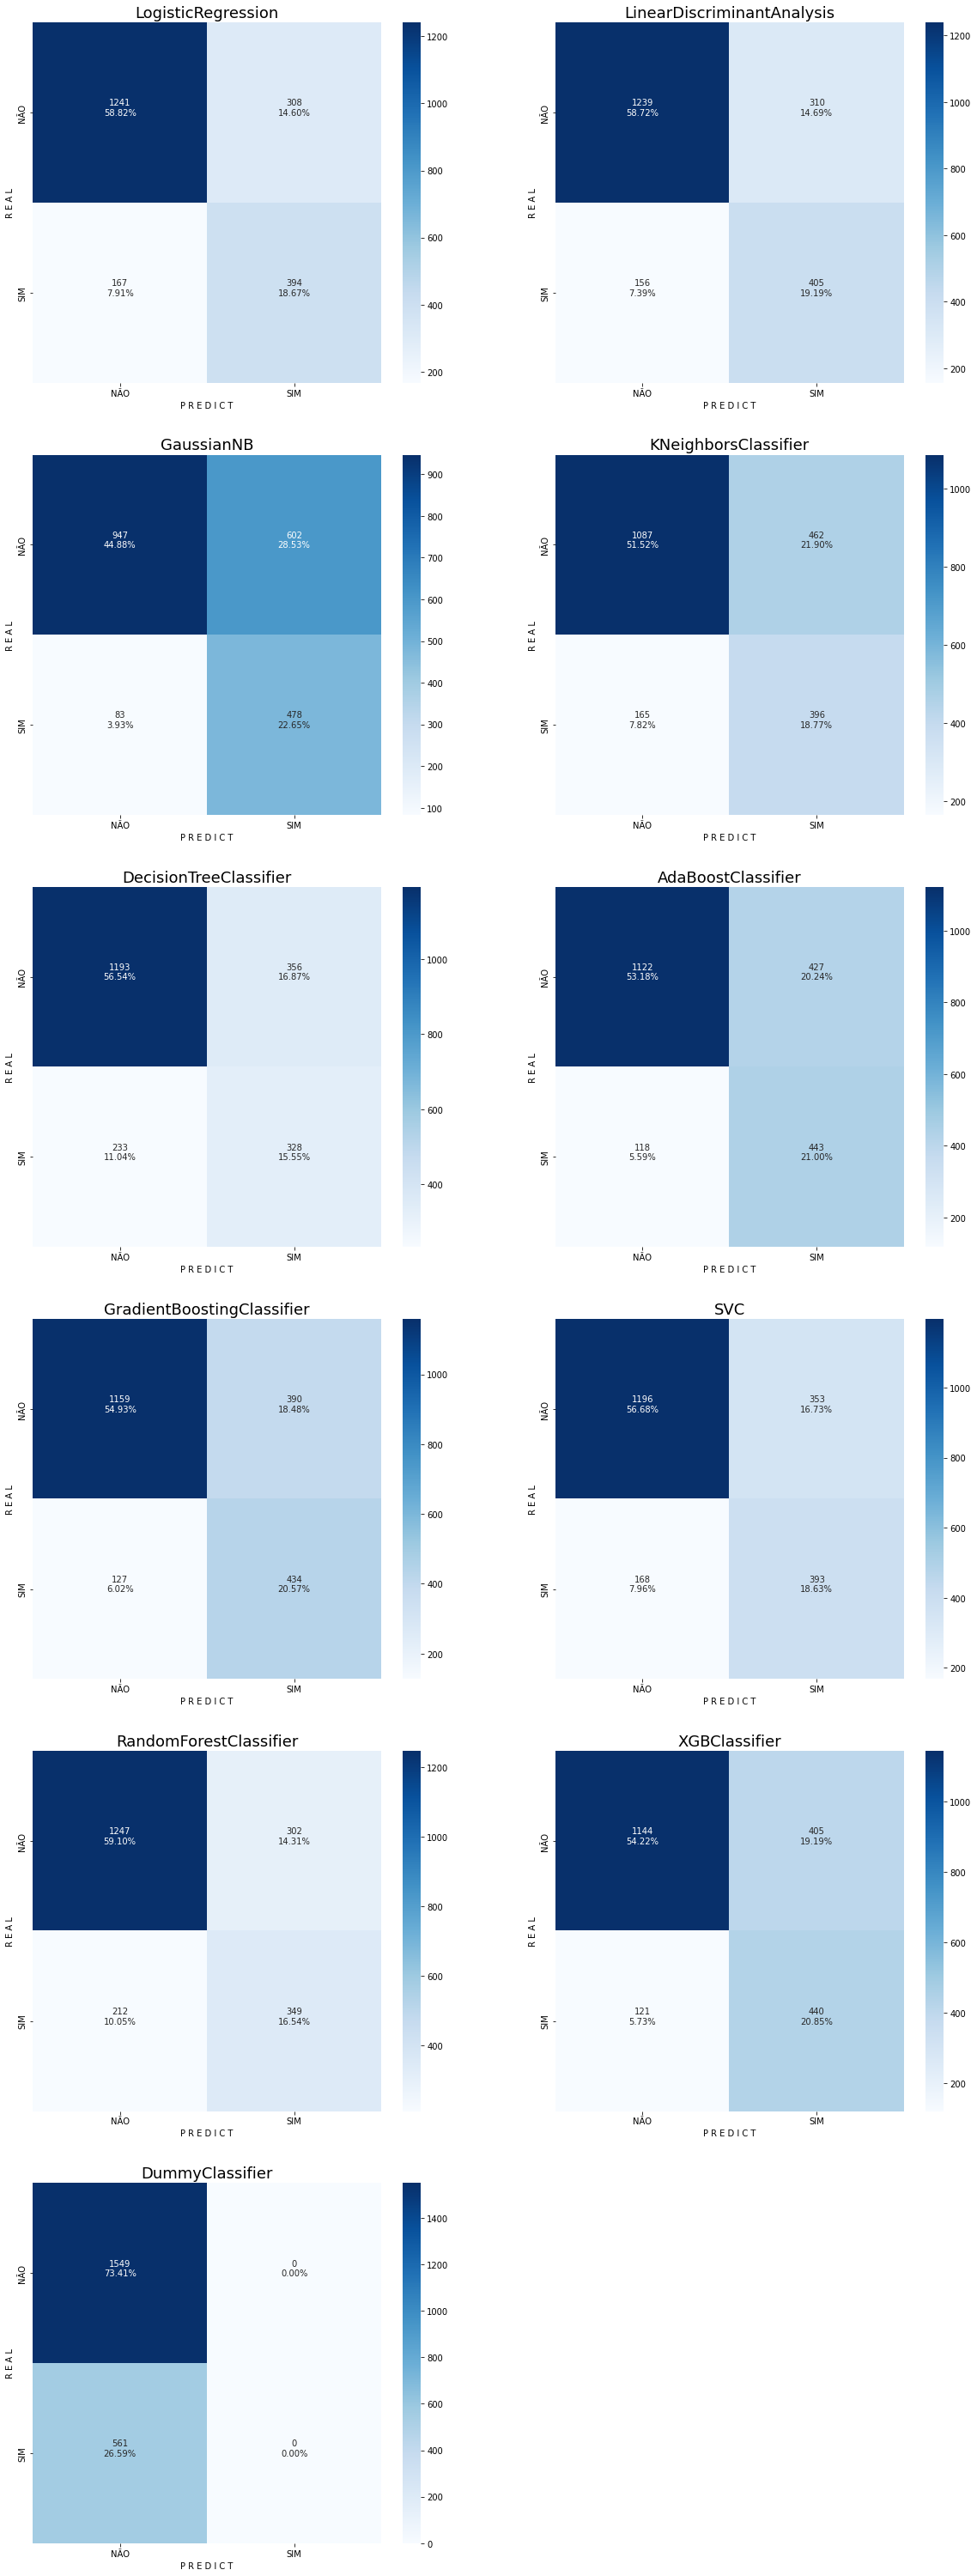

In [ ]:
# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list_ADASYN, models)

##**6.3 Avaliando performances**

Visto ser um problema muito grande previrmos Falsos Negativos para clientes que cancelaram suas contas, iremos utilizar a métrica de **Recall (Sensitivity)** para avaliar o melhor modelo a ser utilizado.

**Recall (Sensitivity)** explica a quantidade de casos positivos previstos corretamente. Muito utilizado em casos onde "disparar um alarme falso" não se torna algo perigoso.

In [ ]:
# Separando os 3 melhores modelos em cada balanceamento
accuracy_results = results.sort_values(by=['Recall (Sensitivity)'], ascending=False).head(3)
accuracy_results_rus = results_rus.sort_values(by=['Recall (Sensitivity)'], ascending=False).head(3)
accuracy_results_SMOTE = results_SMOTE.sort_values(by=['Recall (Sensitivity)'], ascending=False).head(3)
accuracy_results_ADASYN = results_ADASYN.sort_values(by=['Recall (Sensitivity)'], ascending=False).head(3)

results_accuracy = pd.concat([accuracy_results, accuracy_results_rus, accuracy_results_SMOTE, accuracy_results_ADASYN])
results_accuracy.sort_values(by=['Recall (Sensitivity)'], ascending=False)

,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
GradientBoostingClassifier:,0.265877,0.265877,1.000000,0.420067,0.500000
GaussianNB: RUS,0.666825,0.435337,0.852050,0.576251,0.725896
GaussianNB: ADASYN,0.675355,0.442593,0.852050,0.582572,0.731706
LogisticRegression:,0.672038,0.439631,0.850267,0.579587,0.728878
AdaBoostClassifier: RUS,0.729384,0.494703,0.832442,0.620598,0.762251
GaussianNB: SMOTE,0.694787,0.458788,0.823529,0.589286,0.735845
KNeighborsClassifier: RUS,0.692417,0.456262,0.818182,0.585833,0.732525
LinearDiscriminantAnalysis:,0.741706,0.508929,0.812834,0.625944,0.764390
AdaBoostClassifier: ADASYN,0.741706,0.509195,0.789661,0.619147,0.757000
XGBClassifier: ADASYN,0.750711,0.520710,0.784314,0.625889,0.761427


#**7. Otimizando Hiperparâmetros**

In [ ]:
model = LogisticRegression()

# Criando os parâmetros
params = {'penalty'      : ['l1', 'l2'],
          'C'            : [0.001, 0.01, 0.05, 0.1, 0.15, 1, 10, 100],
          'solver'       : ['lbfgs', 'liblinear'],
          'random_state' : [0],
          'tol'          : [0.0001, 0.0005],
          'max_iter'     : [13, 15, 30, 50, 100]}

# Rodando a busca por parâmetros
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
n_iter_search = 100
random_search = RandomizedSearchCV(model, 
                                   param_distributions=params,  
                                   scoring=scorers, 
                                   refit='recall_score',
                                   n_iter=n_iter_search,  
                                   cv=5,  
                                   return_train_score=True, 
                                   n_jobs=-1)

start = time.time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
print('Best params for recall_score')
print("Best parameters:", random_search.best_estimator_)

RandomizedSearchCV took 13.76 seconds for 100 candidates parameter settings.
Best params for recall_score
Best parameters: LogisticRegression(C=100, max_iter=50, random_state=0)


In [ ]:
model = GaussianNB()

# Criando os parâmetros
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# Rodando a busca por parâmetros
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
n_iter_search = 100
random_search = RandomizedSearchCV(model, 
                                   param_distributions=params,  
                                   scoring=scorers, 
                                   refit='recall_score',
                                   n_iter=n_iter_search,  
                                   cv=5,  
                                   return_train_score=True, 
                                   n_jobs=-1)

start = time.time()
random_search.fit(x_rus, y_rus)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
print('Best params for recall_score')
print("Best parameters:", random_search.best_estimator_)

RandomizedSearchCV took 6.97 seconds for 100 candidates parameter settings.
Best params for recall_score
Best parameters: GaussianNB(var_smoothing=1.0)


In [ ]:
model = GaussianNB()

# Criando os parâmetros
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# Rodando a busca por parâmetros
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
n_iter_search = 100
random_search = RandomizedSearchCV(model, 
                                   param_distributions=params,  
                                   scoring=scorers, 
                                   refit='recall_score',
                                   n_iter=n_iter_search,  
                                   cv=5,  
                                   return_train_score=True, 
                                   n_jobs=-1)

start = time.time()
random_search.fit(x_ADASYN, y_ADASYN)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
print('Best params for recall_score')
print("Best parameters:", random_search.best_estimator_)

RandomizedSearchCV took 12.56 seconds for 100 candidates parameter settings.
Best params for recall_score
Best parameters: GaussianNB(var_smoothing=1.0)


,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
GaussianNB:,0.610427,0.397163,0.898396,0.55082,0.702264


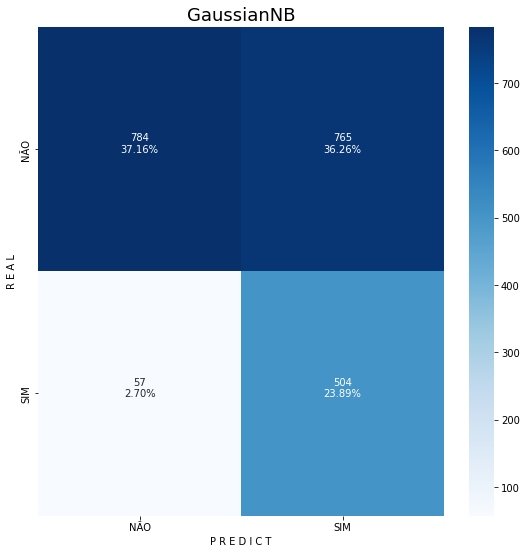

In [ ]:
models = [GaussianNB(var_smoothing=1.0)]

results, cf_matrix_list = classifiersTraining(x_ADASYN, x_test, y_ADASYN, y_test, models)

# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list, models)

# Dataframe com as métricas dos modelos
results

,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
LogisticRegression:,0.794787,0.635021,0.536542,0.581643,0.712428


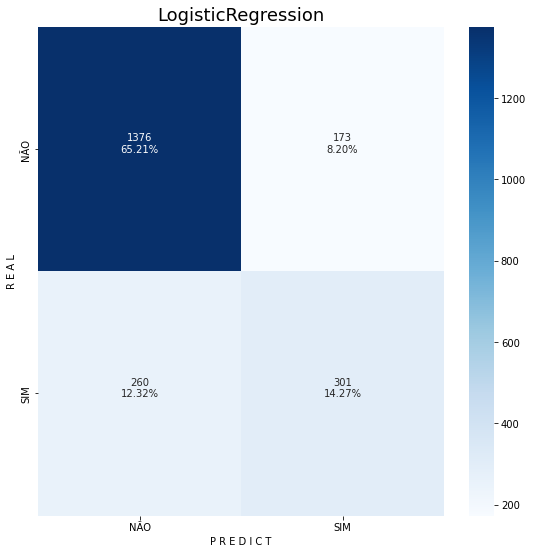

In [ ]:
models = [LogisticRegression(C=100, max_iter=50, random_state=0)]

results, cf_matrix_list = classifiersTraining(x_train, x_test, y_train, y_test, models)

# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list, models)

# Dataframe com as métricas dos modelos
results

,Accuracy,Precision,Recall (Sensitivity),F1,ROC AUC
GaussianNB:,0.609479,0.397185,0.905526,0.552174,0.703893


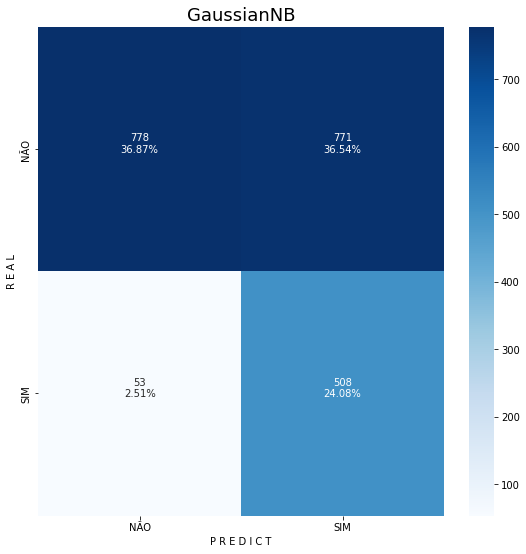

In [ ]:
models = [GaussianNB(var_smoothing=1.0)]

results, cf_matrix_list = classifiersTraining(x_rus, x_test, y_rus, y_test, models)

# Plottando Matriz de Confusão 
plotConfusionMatrix(cf_matrix_list, models)

# Dataframe com as métricas dos modelos
results

#**8. Salvando modelo**

In [ ]:
model = GaussianNB(var_smoothing=1.0)
model.fit(x_rus, y_rus)

pickle.dump(model, open('drive/MyDrive/classifier_gaussianNB.pkl', 'wb'))

#**9. Conclusão - Considerações finais**

Através deste projeto, conseguimos criar um modelo de machine learning com o intuito de prever o quais e quantos clientes cancelaram o serviço com a empresa de telecomunicações. Com estas informações, a empresa poderá adequar suas estratégias e tomadas de decisões para manter o máximo de clientes possível.

Com um **Recall** de 90% o modelo que mais se adequou as nossas necessidades foi o **GaussianNB**.

Vale ressaltar que existe espaço para melhoria do projeto, tanto através de feature engineering, feature selection, aplicações de outros modelos ou até mesmo na coleta de novos dados.